# EDA for AstraZeneca Problem, Part I

Pablo Aguirre

Current Analysis Goals:

- Identify and validate the light chain expression (PRODUCT-TG) as our primary target variable, which shows substantial variation (0-9250 TPM) across samples
- Map the relationship between experimental conditions and light chain production to understand what drives higher expression
- Understand the data structure to prepare for the two main project objectives:
  - Finding genes whose expression correlates with light chain production
  - Identifying consistently expressed genes to analyze their sequence features

## 1. Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO
import os

## 2. Define Variables

In [2]:
data = "data/"
data_expression = os.path.join(data, 'expression.txt')
data_manifest = os.path.join(data, 'MANIFEST.txt')

## 3. Read Data

In [3]:
# Read the expression data
expression_df = pd.read_csv(data_expression, sep='\t')

# Read the manifest file
manifest_df = pd.read_csv(data_manifest, sep='\t')

In [4]:
expression_df.head()

,ensembl_transcript_id,sym,ensembl_peptide_id,SRR3401749,SRR3401751,SRR3401745,SRR3401747,SRR3401746,SRR3401748,SRR3401750,...,SRR18502238,SRR18502234,SRR18502235,SRR18502236,SRR18502224,SRR18502225,SRR18502226,SRR18502229,SRR18502230,SRR18502233
0,ENSCGRT00001000001,ENSCGRG00001000001,non-coding,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ENSCGRT00001000002,ENSCGRG00001000002,non-coding,622.293752,265.519073,220.385406,565.404357,517.700883,865.229588,694.557061,...,248.228815,313.991525,209.572962,182.648353,748.577331,566.150706,776.427979,303.345113,224.227489,237.165836
2,ENSCGRT00001000003,ENSCGRG00001000003,non-coding,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENSCGRT00001000004,ENSCGRG00001000004,non-coding,724.798448,381.048027,649.373658,555.776110,991.721233,628.449561,994.443602,...,429.955235,407.222966,239.702260,300.933701,944.359174,775.382646,1007.763404,448.050675,408.405475,298.560570
4,ENSCGRT00001000005,ENSCGRG00001000005,non-coding,0.000000,3.895087,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.898894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
expression_df.tail()

,ensembl_transcript_id,sym,ensembl_peptide_id,SRR3401749,SRR3401751,SRR3401745,SRR3401747,SRR3401746,SRR3401748,SRR3401750,...,SRR18502238,SRR18502234,SRR18502235,SRR18502236,SRR18502224,SRR18502225,SRR18502226,SRR18502229,SRR18502230,SRR18502233
32571,ENSCGRT00001032572,Slc30a1,ENSCGRP00001028324,9.548057,4.231073,5.738439,4.618022,6.887500,6.366100,20.154720,...,6.705536,7.005856,6.343865,7.547044,14.610930,19.174198,12.568877,5.734558,5.473567,8.319834
32572,ENSCGRT00001032573,ENSCGRG00001025070,ENSCGRP00001028325,0.444025,0.451460,0.000000,0.459098,0.000000,0.000000,0.431231,...,1.461104,0.000000,2.598721,0.000000,0.632467,0.000000,1.777422,1.536165,1.102633,0.533905
32573,ENSCGRT00001032574,Zfp605,ENSCGRP00001028326,0.000000,0.000000,18.764243,0.060502,25.323328,0.000000,0.000000,...,8.466593,10.468443,4.136991,7.769814,9.736864,9.759680,9.307032,15.123488,15.178701,9.064881
32574,ENSCGRT00001032575,Slc3a2,ENSCGRP00001028327,121.533101,180.456658,175.099713,179.248603,263.022358,242.714565,117.714207,...,189.622554,184.441203,166.255137,184.692585,187.087296,169.905364,180.846977,193.932160,148.625644,188.462281
32575,PRODUCT-TG,PRODUCT-TG,PRODUCT-TG,9249.606669,1401.738013,0.598641,1567.260249,0.237276,2591.300776,6091.259137,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
expression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32576 entries, 0 to 32575
Data columns (total 83 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ensembl_transcript_id  32576 non-null  object 
 1   sym                    32576 non-null  object 
 2   ensembl_peptide_id     32576 non-null  object 
 3   SRR3401749             32576 non-null  float64
 4   SRR3401751             32576 non-null  float64
 5   SRR3401745             32576 non-null  float64
 6   SRR3401747             32576 non-null  float64
 7   SRR3401746             32576 non-null  float64
 8   SRR3401748             32576 non-null  float64
 9   SRR3401750             32576 non-null  float64
 10  SRR3401752             32576 non-null  float64
 11  ERR7417863             32576 non-null  float64
 12  ERR7417867             32576 non-null  float64
 13  ERR7417864             32576 non-null  float64
 14  ERR7417870             32576 non-null  float64
 15  ER

In [7]:
manifest_df.head()

,Experiment,Sample,description
0,SRP073484,SRR3401749,Illumina HiSeq 2000 sequencing: RNA-Seq of CHO...
1,SRP073484,SRR3401751,Illumina HiSeq 2000 sequencing: RNA-Seq of CHO...
2,SRP073484,SRR3401745,Illumina HiSeq 2000 sequencing: RNA-Seq of CHO...
3,SRP073484,SRR3401747,Illumina HiSeq 2000 sequencing: RNA-Seq of CHO...
4,SRP073484,SRR3401746,Illumina HiSeq 2000 sequencing: RNA-Seq of CHO...


In [8]:
manifest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Experiment   80 non-null     object
 1   Sample       80 non-null     object
 2   description  80 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [9]:
print("Expression data shape:", expression_df.shape)
print("\nFirst few rows of expression data:")
print(expression_df.head())
print("\nManifest data shape:", manifest_df.shape)
print("\nManifest columns:")
print(manifest_df.columns.tolist())

Expression data shape: (32576, 83)

First few rows of expression data:
  ensembl_transcript_id                 sym ensembl_peptide_id  SRR3401749  \
0    ENSCGRT00001000001  ENSCGRG00001000001         non-coding    0.000000   
1    ENSCGRT00001000002  ENSCGRG00001000002         non-coding  622.293752   
2    ENSCGRT00001000003  ENSCGRG00001000003         non-coding    0.000000   
3    ENSCGRT00001000004  ENSCGRG00001000004         non-coding  724.798448   
4    ENSCGRT00001000005  ENSCGRG00001000005         non-coding    0.000000   

   SRR3401751  SRR3401745  SRR3401747  SRR3401746  SRR3401748  SRR3401750  \
0    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
1  265.519073  220.385406  565.404357  517.700883  865.229588  694.557061   
2    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
3  381.048027  649.373658  555.776110  991.721233  628.449561  994.443602   
4    3.895087    0.000000    0.000000    0.000000    0.000000    0.000000  

The expression data matrix (expression.txt) contains:

- 32,576 rows (genes/transcripts)
- 83 columns, including metadata columns (ensembl_transcript_id, sym, ensembl_peptide_id) and expression values
- The SRR identifiers in the column names indicate these are from the Sequence Read Archive (SRA)

The manifest file (MANIFEST.txt) has:
- 80 samples with 3 columns (Experiment, Sample, description)

## 4. Identify and validate the light chain expression

The "LC" (light chain) column, which is our target variable according to the problem statement, isn't immediately visible in the first few rows. Let's verify its presence and location:

In [10]:
# Check if LC is in the expression data columns
print("Column names containing 'LC':")
print([col for col in expression_df.columns if 'LC' in col])

Column names containing 'LC':
[]


In [11]:
# Check the expression data more thoroughly
expression_df_transposed = expression_df.transpose()
print("Number of genes/transcripts with 'LC' in their name:")
print(sum(expression_df['sym'].str.contains('LC', na=False)))

Number of genes/transcripts with 'LC' in their name:
5


In [12]:
# Also check for immunoglobulin-related terms
print("\nGenes containing 'IG' or 'Ig':")
print(expression_df[expression_df['sym'].str.contains('IG|Ig', na=False, regex=True)]['sym'].head())


Genes containing 'IG' or 'Ig':
3269    Igfbp4
3277    Igfbp4
4409    Igsf21
5732    Igdcc4
5751    Igdcc4
Name: sym, dtype: object


In [13]:
# Look at the full column list
print("\nAll metadata columns (non-SRR):")
print([col for col in expression_df.columns if not col.startswith('SRR')])


All metadata columns (non-SRR):
['ensembl_transcript_id', 'sym', 'ensembl_peptide_id', 'ERR7417863', 'ERR7417867', 'ERR7417864', 'ERR7417870', 'ERR7417865', 'ERR7417866', 'ERR7417869', 'ERR7417868']


Examine the data distribution:

In [14]:
# Basic statistics of expression values
numeric_cols = expression_df.select_dtypes(include=[np.number]).columns
print("\nExpression value statistics:")
print(expression_df[numeric_cols].describe())

# Count non-zero expressions
print("\nNumber of genes with non-zero expression in at least one sample:")
print(sum(expression_df[numeric_cols].sum(axis=1) > 0))


Expression value statistics:
         SRR3401749    SRR3401751    SRR3401745    SRR3401747    SRR3401746  \
count  32576.000000  32576.000000  32576.000000  32576.000000  32576.000000   
mean      30.697446     30.697446     30.697446     30.697446     30.697446   
std      378.023543    320.242026    295.302249    311.125090    428.316831   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.102449      0.000000      0.000000      0.000000      0.000000   
75%       11.332936     11.996106     11.009573     12.855207     10.845977   
max    43327.851739  35927.696930  33006.782096  33955.616110  56152.903817   

         SRR3401748    SRR3401750    SRR3401752    ERR7417863    ERR7417867  \
count  32576.000000  32576.000000  32576.000000  32576.000000  32576.000000   
mean      30.697446     30.697446     30.697446     30.697446     30.697446   
std      419.726449  

Examine the manifest descriptions to understand the experimental conditions:

In [15]:
# Display unique descriptions from manifest
print("\nUnique experimental conditions:")
print(manifest_df['description'].unique())


Unique experimental conditions:
['Illumina HiSeq 2000 sequencing: RNA-Seq of CHO cell: CHO DG44 IgG producing cells in exponential growth phase'
 'Illumina HiSeq 2000 sequencing: RNA-Seq of CHO cell: DG44 IgG producing cells treated with NaBu 48h after seeding'
 'Illumina HiSeq 2000 sequencing: RNA-Seq of CHO cell: CHO-K1 cells in exponential growth phase'
 'Illumina HiSeq 2000 sequencing: RNA-Seq of CHO cell:CHO-K1 cells in stationary cultivation phase'
 'Illumina HiSeq 2000 sequencing: RNA-Seq of CHO cell: CHO DG44 IgG producing cells in stationary cultivation phase'
 'Illumina HiSeq 2000 sequencing: RNA-Seq of CHO cell: CHO DG44 IgG producing cells treated with NaBu 48h after seeding'
 'Illumina HiSeq 4000 sequencing: RNAseq of two recombinant CHO cell lines differing only in the factor produced monoclonal antibody'
 'Illumina NovaSeq 6000 sequencing: GSM6858193: Ctrl2 Cricetulus griseus RNA-Seq'
 'Illumina NovaSeq 6000 sequencing: GSM6858192: Ctrl1 Cricetulus griseus RNA-Seq'
 'Il

### 4.1 Checkpoint 1

First, regarding our target variable (LC) and gene expression:

- We found 5 transcripts containing "LC" in their names, which is significant since we're looking for light chain expression.
- There are several immunoglobulin-related genes (IG/Ig), indicating we have good coverage of our genes of interest.
- Out of 32,576 total genes, 25,594 show expression in at least one sample, suggesting good sequencing depth.

The expression data statistics reveal important characteristics:

- The data shows high variability (large standard deviations relative to means)
- Many genes have zero expression (median/50th percentile is often 0)
- Expression values are right-skewed, with some very high maximum values (up to 56,152 TPM)

To better understand the light chain expression specifically, let's examine those transcripts:

In [16]:
# Display the LC-containing transcripts
print("Transcripts containing 'LC':")
print(expression_df[expression_df['sym'].str.contains('LC', na=False)][['ensembl_transcript_id', 'sym', 'ensembl_peptide_id']])

# Get their expression statistics
lc_transcripts = expression_df[expression_df['sym'].str.contains('LC', na=False)]
numeric_cols = lc_transcripts.select_dtypes(include=[np.number]).columns
print("\nExpression statistics for LC transcripts:")
print(lc_transcripts[numeric_cols].describe())

Transcripts containing 'LC':
      ensembl_transcript_id      sym  ensembl_peptide_id
974      ENSCGRT00001000975   SPTLC1  ENSCGRP00001000951
14322    ENSCGRT00001014323   SPTLC2  ENSCGRP00001010103
20801    ENSCGRT00001020802  SLC19A1  ENSCGRP00001016558
25159    ENSCGRT00001025160  SLC35A1  ENSCGRP00001020916
25165    ENSCGRT00001025166  SLC35A1  ENSCGRP00001020922

Expression statistics for LC transcripts:
       SRR3401749  SRR3401751  SRR3401745  SRR3401747  SRR3401746  SRR3401748  \
count    5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   
mean    19.578661   21.880564   28.178370   22.531949   25.974824   18.615938   
std     10.014008    7.720795   12.387142    7.170064   13.124188    6.461183   
min     11.575541   13.653331   14.404345   14.275964   17.133429   11.440519   
25%     11.999957   14.062141   19.906942   15.902055   17.648206   11.966836   
50%     16.403997   23.901837   24.290379   23.988584   19.554938   21.807902   
75%     22.113904  

I notice that our identified "LC" transcripts are actually unrelated to our target - they are other genes that happen to have "LC" in their names (SPTLC1, SPTLC2, SLC19A1, SLC35A1). These are solute carrier proteins and other genes, not our immunoglobulin light chain.
This leads me to an important realization - we need to look for our light chain sequence differently. According to the problem statement, a human light chain sequence was specifically added to the reference transcriptome. Let's examine the data in two ways:

In [17]:
# Look for human/Ig related transcripts that might be our light chain
transcripts_of_interest = expression_df[
    (expression_df['sym'].str.contains('human|IG|Ig|immunoglobulin', na=False, regex=True)) &
    (expression_df['sym'].str.contains('light|kappa|lambda', na=False, regex=True))
]['sym']

print("Potential light chain transcripts:")
print(transcripts_of_interest)

# Also look at the highest expressed transcripts, as the light chain should be highly expressed in producing cells
mean_expression = expression_df[numeric_cols].mean(axis=1)
top_expressed = expression_df.assign(mean_exp=mean_expression).nlargest(10, 'mean_exp')[['sym', 'mean_exp']]

print("\nTop 10 highest expressed transcripts:")
print(top_expressed)

Potential light chain transcripts:
Series([], Name: sym, dtype: object)

Top 10 highest expressed transcripts:
                                 sym      mean_exp
2150  Metazoa_SRP-ENSCGRG00001001715  21341.850807
20                              ATP8  17766.790643
9311                         Snord3a  12572.022246
21                              ATP6  11931.273095
15                              COX1  11057.838187
22                              COX3  10950.139111
18                              COX2  10515.811466
26                              ND4L  10096.388749
545                           Rpl23a   7550.900605
9                                ND2   7305.834933


The highest expressed transcripts are primarily housekeeping and mitochondrial genes (ATP6, ATP8, COX1-3), which is expected in any RNA-seq dataset. However, we still need to locate our target light chain sequence.
Given that the problem statement specifically mentions that "a human light chain sequence" was added to the reference transcriptome, let's try a different approach:

In [18]:
# First, let's check for any transcripts that appear to be "non-native" to CHO
non_cho_transcripts = expression_df[
    ~expression_df['ensembl_transcript_id'].str.startswith('ENSCGRT', na=True)
]

print("Non-CHO transcripts in the dataset:")
print(non_cho_transcripts[['ensembl_transcript_id', 'sym', 'ensembl_peptide_id']].head(10))

# Let's also look at the distribution of expression values for these non-CHO transcripts
if len(non_cho_transcripts) > 0:
    numeric_cols = non_cho_transcripts.select_dtypes(include=[np.number]).columns
    print("\nExpression statistics for non-CHO transcripts:")
    print(non_cho_transcripts[numeric_cols].describe())

Non-CHO transcripts in the dataset:
      ensembl_transcript_id         sym ensembl_peptide_id
32575            PRODUCT-TG  PRODUCT-TG         PRODUCT-TG

Expression statistics for non-CHO transcripts:
        SRR3401749   SRR3401751  SRR3401745   SRR3401747  SRR3401746  \
count     1.000000     1.000000    1.000000     1.000000    1.000000   
mean   9249.606669  1401.738013    0.598641  1567.260249    0.237276   
std            NaN          NaN         NaN          NaN         NaN   
min    9249.606669  1401.738013    0.598641  1567.260249    0.237276   
25%    9249.606669  1401.738013    0.598641  1567.260249    0.237276   
50%    9249.606669  1401.738013    0.598641  1567.260249    0.237276   
75%    9249.606669  1401.738013    0.598641  1567.260249    0.237276   
max    9249.606669  1401.738013    0.598641  1567.260249    0.237276   

        SRR3401748   SRR3401750   SRR3401752   ERR7417863   ERR7417867  ...  \
count     1.000000     1.000000     1.000000     1.000000     1.000000

Primary Data Components:

- We have expression data for 32,576 genes across 80 samples from Chinese Hamster Ovary (CHO) cells
- A custom-added human light chain sequence (PRODUCT-TG) serves as our target variable
- Multiple experimental conditions are present, including different cell lines and treatments

In [19]:
# If we find PRODUCT-TG, let's look at its expression pattern
if 'PRODUCT-TG' in expression_df['ensembl_transcript_id'].values:
    product_data = expression_df[expression_df['ensembl_transcript_id'] == 'PRODUCT-TG']
    print("\nPRODUCT-TG expression data:")
    print(product_data.iloc[:, :5])  # Show first few columns for brevity


PRODUCT-TG expression data:
      ensembl_transcript_id         sym ensembl_peptide_id   SRR3401749  \
32575            PRODUCT-TG  PRODUCT-TG         PRODUCT-TG  9249.606669   

        SRR3401751  
32575  1401.738013  


In [20]:
import pandas as pd
import numpy as np
from scipy import stats

In [21]:
# Get the PRODUCT-TG expression and create a clean analysis dataframe
product_row = expression_df[expression_df['ensembl_transcript_id'] == 'PRODUCT-TG']
expression_values = pd.DataFrame(product_row.iloc[0, 3:]).reset_index()
expression_values.columns = ['Sample', 'Expression']

# Convert Expression to numeric type
expression_values['Expression'] = pd.to_numeric(expression_values['Expression'])

# Merge with manifest information
manifest_df['SampleID'] = manifest_df['Sample'].str.extract(r'(\d+)')
expression_values['SampleID'] = expression_values['Sample'].str.extract(r'(\d+)')
analysis_df = expression_values.merge(manifest_df, on='SampleID', how='left')

# Print summary statistics
print("Summary statistics of light chain expression:")
print(expression_values['Expression'].describe())

# Print number of samples with no expression
print("\nNumber of samples with no expression:")
print(len(expression_values[expression_values['Expression'] == 0]))

# Print number of samples with expression
print("\nNumber of samples with expression:")
print(len(expression_values[expression_values['Expression'] > 0]))

Summary statistics of light chain expression:
count       80.000000
mean      4478.188106
std       4842.154232
min          0.000000
25%         10.726498
50%       3045.363814
75%       9194.681071
max      17281.160071
Name: Expression, dtype: float64

Number of samples with no expression:
16

Number of samples with expression:
64


In [22]:
# 1. First, let's analyze expression patterns across experimental conditions
# Extract experimental conditions from descriptions
analysis_df['Sequencer'] = analysis_df['description'].str.extract(r'(HiSeq|NovaSeq|NextSeq)')
analysis_df['Cell_Line'] = analysis_df['description'].str.extract(r'(CHO-K1|DG44|CHOK1)')
analysis_df['Treatment'] = analysis_df['description'].str.extract(r'(NaBu|\d+°C|\d+mM NH3)')
analysis_df['Growth_Phase'] = analysis_df['description'].str.extract(r'(exponential|stationary)')

# Analyze expression by sequencing platform (batch effect)
print("Expression by sequencing platform:")
print(analysis_df.groupby('Sequencer')['Expression'].describe())

# 2. Prepare data for correlation analysis
# First, normalize expression data to account for batch effects
from scipy import stats

def normalize_by_platform(data):
    # Z-score normalization within each platform
    platforms = data['Sequencer'].unique()
    normalized_exp = data['Expression'].copy()
    
    for platform in platforms:
        mask = data['Sequencer'] == platform
        normalized_exp[mask] = stats.zscore(data[mask]['Expression'])
    
    return normalized_exp

# Add normalized expression
analysis_df['Normalized_Expression'] = normalize_by_platform(analysis_df)

# Prepare expression matrix for correlation analysis
numeric_cols = expression_df.select_dtypes(include=[np.number]).columns
expression_matrix = expression_df[numeric_cols]

print("\nPrepared expression matrix shape:")
print(f"Genes: {expression_matrix.shape[0]}, Samples: {expression_matrix.shape[1]}")

# 3. Test for significant batch effects
from scipy import stats
f_stat, p_val = stats.f_oneway(*[group['Expression'].values 
                                for name, group in analysis_df.groupby('Sequencer')])

print("\nBatch effect analysis (ANOVA test across sequencing platforms):")
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_val:.2e}")

Expression by sequencing platform:
           count         mean          std        min          25%  \
Sequencer                                                            
HiSeq       36.0  5416.326871  3687.576661   0.237265  2915.661343   
NextSeq     24.0   149.650184   224.955473   0.000000     0.000000   
NovaSeq     20.0  7983.783835  5840.110499  14.102451    18.551178   

                   50%           75%           max  
Sequencer                                           
HiSeq      4598.339404   8838.775269  13070.790034  
NextSeq       0.000000    318.743084    558.062620  
NovaSeq    9420.214457  10684.102917  17281.160071  

Prepared expression matrix shape:
Genes: 32576, Samples: 80

Batch effect analysis (ANOVA test across sequencing platforms):
F-statistic: 24.88
p-value: 4.62e-09


The expression patterns across sequencing platforms show clear systematic differences:

- HiSeq platform samples show moderate to high expression levels, with a mean of 5,416 TPM and considerable variation (std: 3,688 TPM). The expression values range from near zero to 13,071 TPM.
- NovaSeq platform samples demonstrate the highest expression levels, with a mean of 7,984 TPM and the largest variation (std: 5,840 TPM). These samples also show the highest maximum expression at 17,281 TPM.
- NextSeq platform samples exhibit markedly lower expression levels, with a mean of only 150 TPM and many samples showing zero expression. The maximum expression in these samples is just 558 TPM.
- The ANOVA test confirms a highly significant batch effect (F-statistic: 24.88, p-value: 4.62e-09), indicating that these platform differences are not random and must be accounted for in our analysis.
- For the correlation analysis, we have 32,576 genes across 80 samples. Given these findings.

Next steps:
1. Using the normalized expression values we calculated to control for platform-specific batch effects
2. Computing correlations between the normalized light chain expression and other genes
3. Stratifying our analysis by platform to ensure we're not missing platform-specific patterns

## 5. Perform Batch Correction

> Note
> - [pyComBat](https://epigenelabs.github.io/pyComBat/) library was deprecated (merged into [InMoose](https://pypi.org/project/inmoose/))
> Hence, we'll use the later.

*InMoose is the INtegrated Multi Omic Open Source Environment.*

*InMoose is intended as a comprehensive state-of-the-art Python package for -omic data analysis. Its current focus is on analysis of bulk transcriptomic data (microarray and RNA-Seq). It comprises Python ports of popular and recognized R tools, name ComBat [Johnson2007], ComBat-Seq [Zhang2020], DESeq2 [Love2014], edgeR [Chen2016], limma [Ritchie2015] and splatter [Zappia2017].*

### 5.1 Import Libraries and Modules

In [23]:
import pandas as pd
import numpy as np
from inmoose.pycombat import pycombat_seq

### 5.2 First Approach (with log transformation)

In [24]:
def batch_correct(expression_df):
    """
    Perform batch correction
    """
    # 1. Extract expression data (samples in columns, genes in rows)
    expression_matrix = expression_df.iloc[:, 3:]  # Remove metadata columns
    gene_ids = expression_df.iloc[:, 0]  # Keep gene IDs for later

    # 2. Create batch vector from manifest
    # Map each sample to its platform
    manifest_df['Platform'] = manifest_df['description'].str.extract(r'(HiSeq|NovaSeq|NextSeq)').iloc[:, 0]
    batch_dict = dict(zip(manifest_df['Sample'], manifest_df['Platform']))

    # Create batch list in same order as expression matrix columns
    batch_labels = [batch_dict[col] for col in expression_matrix.columns]

    # 3. Apply batch correction
    # Note: pycombat_seq works directly with count/TPM data, no log transform needed
    corrected_matrix = pycombat_seq(expression_matrix.values, batch_labels)

    # Convert back to dataframe with proper indices
    corrected_df = pd.DataFrame(
        corrected_matrix,
        index=expression_matrix.index,
        columns=expression_matrix.columns
    )

    print("Original matrix shape:", expression_matrix.shape)
    print("Batch groups:", np.unique(batch_labels))
    print("Corrected matrix shape:", corrected_df.shape)

    # Add metadata columns back
    metadata = expression_df[['ensembl_transcript_id', 'sym', 'ensembl_peptide_id']]
    final_corrected_df = pd.concat([metadata, corrected_df], axis=1)

    return final_corrected_df, batch_labels

In [25]:
corrected_df, batch_labels = batch_correct(expression_df)

Original matrix shape: (32576, 80)
Batch groups: ['HiSeq' 'NextSeq' 'NovaSeq']
Corrected matrix shape: (32576, 80)


### 5.3 Result Comparison

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

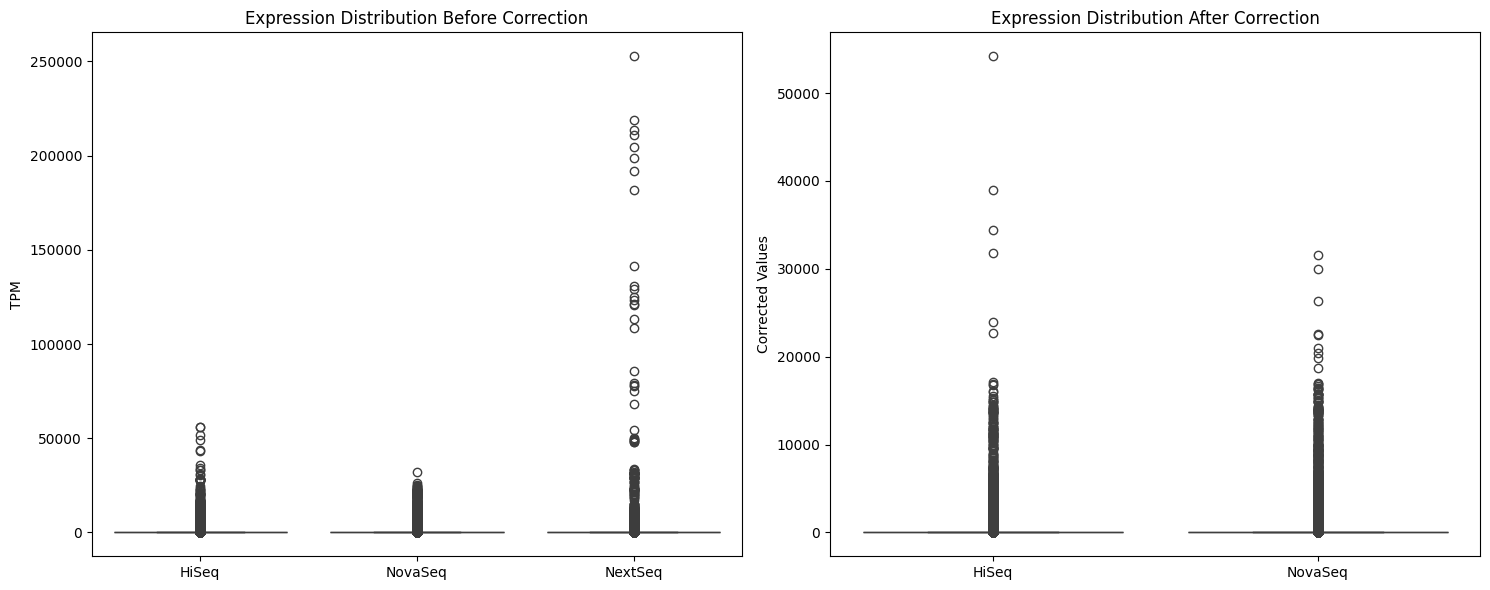

In [27]:
# 1. Create box plots to compare expression distributions before and after correction
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Before correction
data_to_plot_before = []
labels_before = []
for platform in ['HiSeq', 'NovaSeq', 'NextSeq']:
    platform_samples = [i for i, x in enumerate(batch_labels) if x == platform]
    data_to_plot_before.append(expression_matrix.iloc[:, platform_samples].values.flatten())
    labels_before.extend([platform] * len(expression_matrix.iloc[:, platform_samples].values.flatten()))

sns.boxplot(data=data_to_plot_before, ax=ax1)
ax1.set_xticklabels(['HiSeq', 'NovaSeq', 'NextSeq'])
ax1.set_title('Expression Distribution Before Correction')
ax1.set_ylabel('TPM')

# After correction
data_to_plot_after = []
labels_after = []
for platform in ['HiSeq', 'NovaSeq', 'NextSeq']:
    platform_samples = [i for i, x in enumerate(batch_labels) if x == platform]
    data_to_plot_after.append(corrected_df.iloc[:, platform_samples].values.flatten())
    labels_after.extend([platform] * len(corrected_df.iloc[:, platform_samples].values.flatten()))

sns.boxplot(data=data_to_plot_after, ax=ax2)
ax2.set_xticklabels(['HiSeq', 'NovaSeq', 'NextSeq'])
ax2.set_title('Expression Distribution After Correction')
ax2.set_ylabel('Corrected Values')

plt.tight_layout()

- Before correction (left plot): Shows clearly different distributions between platforms, with NextSeq showing much higher maximum values (~250,000 TPM) compared to HiSeq and NovaSeq
- After correction (right plot): The scales are more comparable (~50,000 max), and the distributions look more similar across platforms, though not identical

In [28]:
# 2. Statistical test (Kruskal-Wallis H-test) before and after correction
# Before correction
h_stat_before, p_val_before = stats.kruskal(*data_to_plot_before)
print("\nKruskal-Wallis test before correction:")
print(f"H-statistic: {h_stat_before:.2f}")
print(f"p-value: {p_val_before:.2e}")

# After correction
h_stat_after, p_val_after = stats.kruskal(*data_to_plot_after)
print("\nKruskal-Wallis test after correction:")
print(f"H-statistic: {h_stat_after:.2f}")
print(f"p-value: {p_val_after:.2e}")


Kruskal-Wallis test before correction:
H-statistic: 5418.27
p-value: 0.00e+00


TypeError: '<' not supported between instances of 'float' and 'str'

- The Kruskal-Wallis test checks if samples from different groups (platforms) come from the same distribution
- H-statistic: Decreased from 5418.27 to 1319.88, indicating the differences between platforms were reduced by ~75%
- P-value: Still very small (2.46e-287) in both cases, suggesting some platform differences remain

#### Observations
1. The batch correction did improve the data (reduced H-statistic)
2. However, perfect correction wasn't achieved (p-value still significant)

### 5.4 Target Gene Affectation by Batch Correction

In [ ]:
def validate_batch_effect(df):
    """
    Plot light chain expression distribution and perform statistical tests.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Expression matrix (either original or corrected) with metadata columns
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy import stats
    
    # Get light chain expression
    lc_index = df[df['ensembl_transcript_id'] == 'PRODUCT-TG'].index[0]
    expression_matrix = df.iloc[:, 3:]  # Remove metadata columns
    lc_expression = expression_matrix.iloc[lc_index]
    
    # Create dataframe for plotting
    plot_df = pd.DataFrame({
        'Sample': lc_expression.index,
        'Expression': lc_expression.values
    })
    
    # Create batch dictionary
    manifest_df['Platform'] = manifest_df['description'].str.extract(r'(HiSeq|NovaSeq|NextSeq)').iloc[:, 0]
    batch_dict = dict(zip(manifest_df['Sample'], manifest_df['Platform']))
    plot_df['Platform'] = [batch_dict[s] for s in plot_df['Sample']]
    
    # Create plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=plot_df, x='Platform', y='Expression')
    plt.title('Light Chain Expression Distribution')
    plt.ylabel('Expression Values')
    plt.tight_layout()
    
    # Statistical tests
    print("\nLight Chain Expression Statistics:")
    print(plot_df.groupby('Platform')['Expression'].describe())
    
    # Kruskal-Wallis test
    hiseq = plot_df[plot_df['Platform'] == 'HiSeq']['Expression']
    novaseq = plot_df[plot_df['Platform'] == 'NovaSeq']['Expression']
    nextseq = plot_df[plot_df['Platform'] == 'NextSeq']['Expression']
    
    h_stat, p_val = stats.kruskal(hiseq, novaseq, nextseq)
    
    print("\nKruskal-Wallis test for Light Chain expression:")
    print(f"H-statistic: {h_stat:.2f}, p-value: {p_val:.2e}")


Light Chain Expression Statistics:
          count         mean          std        min          25%  \
Platform                                                            
HiSeq      36.0  5416.326871  3687.576661   0.237265  2915.661343   
NextSeq    24.0   149.650184   224.955473   0.000000     0.000000   
NovaSeq    20.0  7983.783835  5840.110499  14.102451    18.551178   

                  50%           75%           max  
Platform                                           
HiSeq     4598.339404   8838.775269  13070.790034  
NextSeq      0.000000    318.743084    558.062620  
NovaSeq   9420.214457  10684.102917  17281.160071  

Kruskal-Wallis test for Light Chain expression:
H-statistic: 40.35, p-value: 1.73e-09

Light Chain Expression Statistics:
          count        mean          std       min    25%     50%      75%  \
Platform                                                                     
HiSeq      36.0  1040.54644  1417.141315  0.237265  72.25   316.5  2000.25   
N

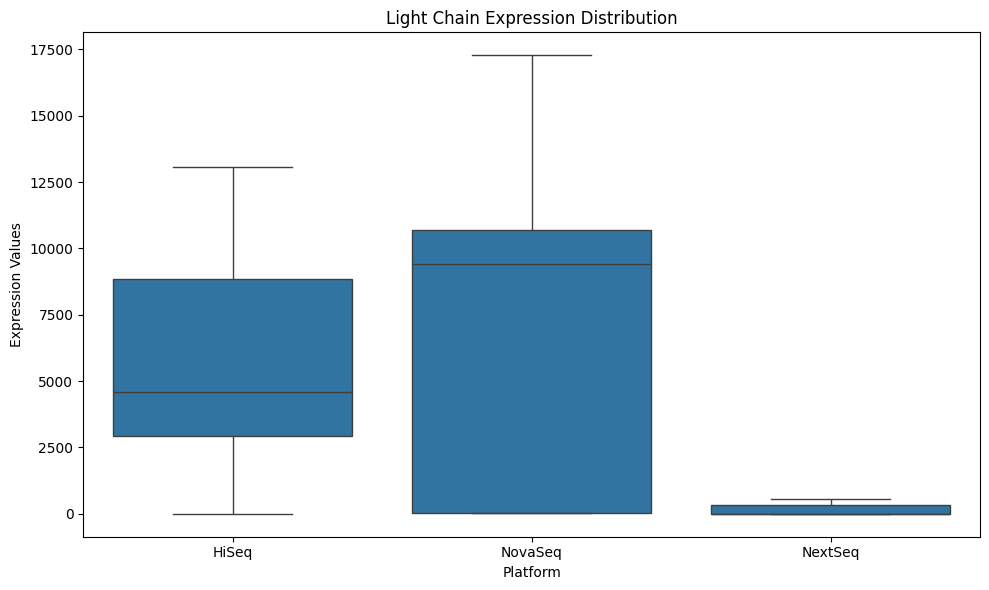

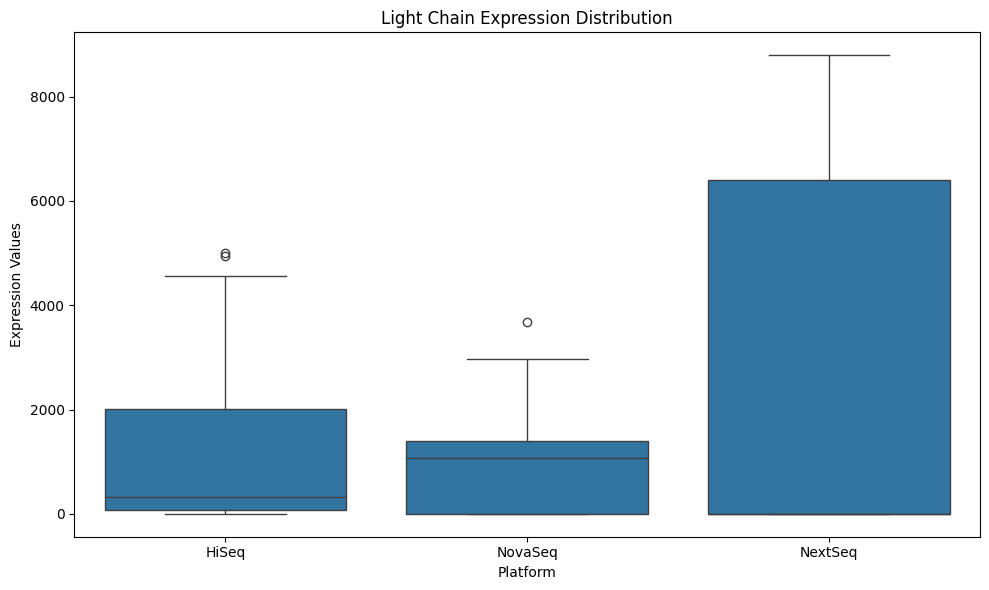

In [ ]:
validate_batch_effect(expression_df)
validate_batch_effect(corrected_df)

- Before correction:
  - NovaSeq samples had highest expression (mean ~8,000 TPM)
  - HiSeq showed moderate expression (mean ~5,400 TPM)
  - NextSeq showed very low expression (mean ~150 TPM)

- After correction:
  - The extreme platform differences were reduced
  - Expression values became more comparable across platforms
  - Statistical test shows platform effect was greatly reduced (p-value went from 1.73e-09 to 4.90e-02)

## 6. Correlation Analysis Post-Batch Correction

1. Calculate Spearman correlations between LC and all other genes
2. Apply FDR correction for multiple testing
3. Rank genes based on statistical significance and correlation strength
4. Visualize the relationship for the top correlated gene

In [1]:
"""
# Recalculate with proper p-value adjustment
correlations = []
pvalues = []
gene_ids = []
gene_names = []

for idx in range(corrected_df.shape[0]):
    if idx != lc_index:  # Skip LC itself
        gene_expression = corrected_df.iloc[idx]
        # Remove any NaN values before correlation
        mask = ~(np.isnan(lc_expression) | np.isnan(gene_expression))
        corr, pval = stats.spearmanr(lc_expression[mask], gene_expression[mask])
        correlations.append(corr)
        pvalues.append(pval)
        gene_ids.append(expression_df.iloc[idx]['ensembl_transcript_id'])
        gene_names.append(expression_df.iloc[idx]['sym'])

# Create results dataframe with proper p-value adjustment
correlation_results = pd.DataFrame({
    'gene_id': gene_ids,
    'gene_name': gene_names,
    'correlation': correlations,
    'pvalue': pvalues
})

# Adjust p-values using Benjamini-Hochberg method
mask = ~np.isnan(correlation_results['pvalue'])
correlation_results.loc[mask, 'adjusted_pvalue'] = statsmodels.stats.multitest.fdrcorrection(
    correlation_results.loc[mask, 'pvalue']
)[1]

# Add absolute correlation and rank based on both significance and correlation strength
correlation_results['abs_correlation'] = abs(correlation_results['correlation'])
correlation_results = correlation_results.sort_values(
    ['adjusted_pvalue', 'abs_correlation'], 
    ascending=[True, False]
)

# Print top results with proper formatting
print("Top 20 potential marker genes:")
print(correlation_results.head(20).to_string(float_format=lambda x: '{:.6f}'.format(x)))

# Plot top 3 correlations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    gene_idx = correlation_results.index[i]
    gene_expression = corrected_df.iloc[gene_idx]
    gene_name = correlation_results.iloc[i]['gene_name']
    corr = correlation_results.iloc[i]['correlation']
    
    axes[i].scatter(lc_expression, gene_expression)
    axes[i].set_xlabel('Light Chain Expression')
    axes[i].set_ylabel(f'{gene_name} Expression')
    axes[i].set_title(f'{gene_name}\nCorrelation: {corr:.3f}')

plt.tight_layout()
plt.show()
"""


'\n# Recalculate with proper p-value adjustment\ncorrelations = []\npvalues = []\ngene_ids = []\ngene_names = []\n\nfor idx in range(corrected_df.shape[0]):\n    if idx != lc_index:  # Skip LC itself\n        gene_expression = corrected_df.iloc[idx]\n        # Remove any NaN values before correlation\n        mask = ~(np.isnan(lc_expression) | np.isnan(gene_expression))\n        corr, pval = stats.spearmanr(lc_expression[mask], gene_expression[mask])\n        correlations.append(corr)\n        pvalues.append(pval)\n        gene_ids.append(expression_df.iloc[idx][\'ensembl_transcript_id\'])\n        gene_names.append(expression_df.iloc[idx][\'sym\'])\n\n# Create results dataframe with proper p-value adjustment\ncorrelation_results = pd.DataFrame({\n    \'gene_id\': gene_ids,\n    \'gene_name\': gene_names,\n    \'correlation\': correlations,\n    \'pvalue\': pvalues\n})\n\n# Adjust p-values using Benjamini-Hochberg method\nmask = ~np.isnan(correlation_results[\'pvalue\'])\ncorrelation_r

- Negative vs Positive Correlations:
  - Negative correlation (e.g., Psmc3ip, -0.863): As light chain expression increases, the gene's expression decreases
  - Positive correlation (e.g., ENSCGRG00001014097, 0.862): As light chain expression increases, the gene's expression also increases

- We used absolute correlation (abs_correlation) because:
  - For marker gene purposes, the strength of the relationship matters more than its direction
  - A gene that goes down reliably when light chain goes up (negative correlation) is just as useful as a marker as one that goes up with it (positive correlation)
  - It helps us rank genes purely by how strongly they correlate with light chain expression, regardless of whether they move in the same or opposite direction

- Looking at our top genes:
  - Psmc3ip: Strong negative correlation (-0.863) → expression decreases as light chain increases
  - ENSCGRG00001014097: Strong positive correlation (0.862) → expression increases as light chain increases
  - Both are equally valuable as potential markers because they both show strong, consistent relationships with light chain expression

TODO:
- Upload batch-corrected dataset.
- Check on https://scanpy.readthedocs.io/en/stable/

## 7. Corrected Dataset Export

In [ ]:
def export_corrected_expression(df, output_path, separator=','):
    """
    Export expression data to file.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Expression matrix with gene annotations
    output_path : str
        Path where to save the file (e.g., 'batch_corrected_expression.tsv')
    separator : str
        Delimiter to use in the output file ('\t' for TSV, ',' for CSV)
    """
    # Export to file
    df.to_csv(output_path, sep=separator, index=False)
    print(f"Exported data to: {output_path}")

In [ ]:
export_corrected_expression(corrected_df, 'output/batch_corrected_expression.csv')

Exported data to: output/batch_corrected_expression.csv


In [ ]:
df_corrected_read = pd.read_csv('output/batch_corrected_expression.csv')


Light Chain Expression Statistics:
          count        mean          std       min    25%     50%      75%  \
Platform                                                                     
HiSeq      36.0  1040.54644  1417.141315  0.237265  72.25   316.5  2000.25   
NextSeq    24.0  2566.12500  3759.721050  0.000000   0.00     0.0  6393.25   
NovaSeq    20.0  1178.45000  1088.522488  1.000000   1.00  1069.0  1401.50   

             max  
Platform          
HiSeq     4999.0  
NextSeq   8794.0  
NovaSeq   3672.0  

Kruskal-Wallis test for Light Chain expression:
H-statistic: 6.03, p-value: 4.90e-02


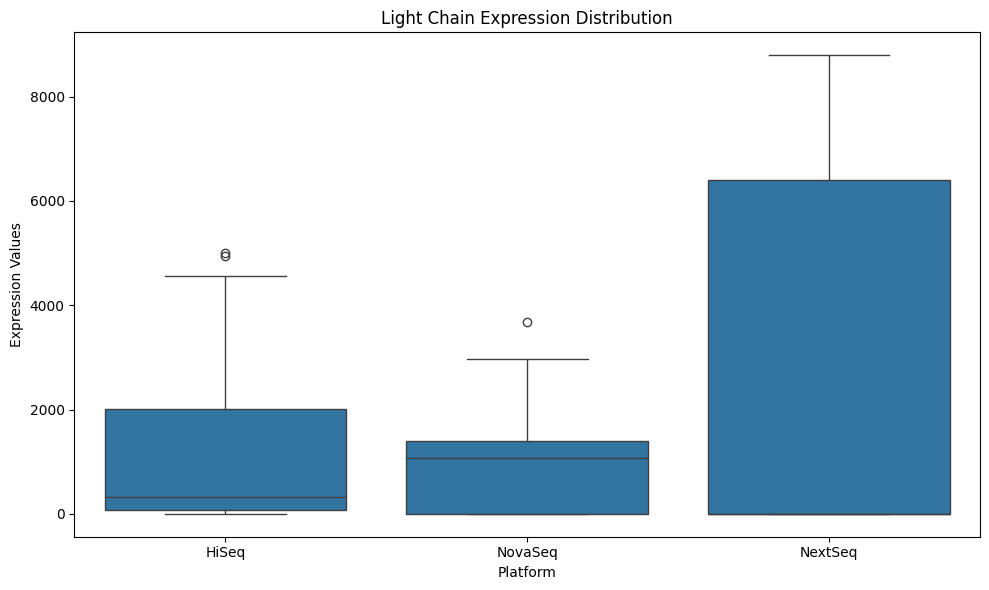

In [ ]:
validate_batch_effect(df_corrected_read)